In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random as python_random
from tqdm import tqdm
import keras
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
np.random.seed(150)
tf.random.set_seed(1115)
python_random.seed(150)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects


In [199]:
data = pd.read_csv("BankNote.csv")
data.head(5)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [200]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [201]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [202]:
x= data.drop(["class"],axis=1)

In [203]:
y= data["class"]

In [204]:
sm = SMOTE(random_state = 42)
x, y = sm.fit_resample(x,y)
pd.Series(y).value_counts()

1    762
0    762
Name: class, dtype: int64

In [205]:
X_train,X_test,y_train,y_test = train_test_split(x ,y,test_size=0.2,random_state=8)

In [206]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [207]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [208]:
# sigmoid
def sigmoid(x):
    return K.sigmoid(x)

In [209]:
model = Sequential()
model.add(Dense(10, input_dim = 4))
model.add(Activation(sigmoid, name='CustomSigmoid'))

model.add(Dense(1,activation='sigmoid'))                   

model.add(Dense(1))

print(model.summary())

Model: "sequential_1784"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5352 (Dense)           (None, 10)                50        
_________________________________________________________________
CustomSigmoid (Activation)   (None, 10)                0         
_________________________________________________________________
dense_5353 (Dense)           (None, 1)                 11        
_________________________________________________________________
dense_5354 (Dense)           (None, 1)                 2         
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________
None


In [210]:
opt = keras.optimizers.Adam(learning_rate=0.01)

In [211]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'], optimizer= opt)

In [212]:

results = model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=100, )

Epoch 1/100
39/39 [==============================] - 0s 5ms/step - loss: 0.7075 - accuracy: 0.5456 - val_loss: 0.6632 - val_accuracy: 0.5369
Epoch 2/100
39/39 [==============================] - 0s 1ms/step - loss: 0.6562 - accuracy: 0.6297 - val_loss: 0.6398 - val_accuracy: 0.6393
Epoch 3/100
39/39 [==============================] - 0s 1ms/step - loss: 0.6198 - accuracy: 0.6892 - val_loss: 0.6085 - val_accuracy: 0.7500
Epoch 4/100
39/39 [==============================] - 0s 1ms/step - loss: 0.5752 - accuracy: 0.8062 - val_loss: 0.5520 - val_accuracy: 0.7623
Epoch 5/100
39/39 [==============================] - 0s 1ms/step - loss: 0.5089 - accuracy: 0.8103 - val_loss: 0.4882 - val_accuracy: 0.8074
Epoch 6/100
39/39 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.8462 - val_loss: 0.4272 - val_accuracy: 0.8156
Epoch 7/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8554 - val_loss: 0.3780 - val_accuracy: 0.8361
Epoch 8/100
3

Epoch 59/100
39/39 [==============================] - 0s 1ms/step - loss: 0.0090 - accuracy: 0.9979 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 60/100
39/39 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 61/100
39/39 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 0.9979 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 62/100
39/39 [==============================] - 0s 1ms/step - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 63/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 0.9990 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 64/100
39/39 [==============================] - 0s 1ms/step - loss: 0.0078 - accuracy: 0.9979 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 65/100
39/39 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.9979 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 

In [213]:
model.evaluate(X_test,y_test,verbose=2)

10/10 - 0s - loss: 0.0048 - accuracy: 0.9967


[0.0047590117901563644, 0.9967213273048401]

In [214]:
predict = model.predict(X_test)
predictions = predict > 0.5

In [215]:
from sklearn.metrics import confusion_matrix

In [216]:
from sklearn.metrics import cohen_kappa_score

In [217]:
cmsig = confusion_matrix(y_test, predictions)

In [218]:
cmsig

array([[153,   1],
       [  0, 151]], dtype=int64)

In [219]:
FPSig = cmsig[0][1]
FNSig = cmsig[1][0]
TPSig = cmsig[0][0]
TNSig = cmsig[1][1]

In [220]:
print('False Positives\n {}'.format(FPSig))
print('False Negetives\n {}'.format(FNSig))
print('True Positives\n {}'.format(TPSig))
print('True Negetives\n {}'.format(TNSig))

Precision = TPSig/(TPSig+FPSig)
print('Precision \n{}'.format(Precision))
Recall = TPSig/(TPSig+FNSig)
print('Recall \n{}'.format(Recall))
Acc = (TPSig+TNSig)/(TPSig+TNSig+FPSig+FNSig)
print('Accuracy \n{}'.format(Acc))
F1score = 2*(Precision*Recall)/(Precision+Recall)
print('F1Score \n{}'.format(F1score))
k=cohen_kappa_score(y_test, predictions)
print('Cohen Kappa \n{}'.format(k))

False Positives
 1
False Negetives
 0
True Positives
 153
True Negetives
 151
Precision 
0.9935064935064936
Recall 
1.0
Accuracy 
0.9967213114754099
F1Score 
0.9967426710097721
Cohen Kappa 
0.9934424114725549


In [221]:
model.save('banknote1.txt')

INFO:tensorflow:Assets written to: banknote1.txt\assets


In [222]:
#k0 +k1*x
def relu(x):
    return (k0 + k1*x)

In [223]:
def model_build():
    model = Sequential()
    model.add(Dense(10, input_dim = 4))
    model.add(Activation(relu, name='CustomRelu'))
    model.add(Dense(1,activation='sigmoid')) 
    model.add(Dense(1))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy',metrics=['accuracy'], optimizer= opt)
    results = model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=60, verbose=0)
    print(model.evaluate(X_test,y_test,verbose=0))
    
    a = model.evaluate(X_test,y_test,verbose=0)[0]
    b = model.evaluate(X_test,y_test,verbose=0)[1]
    return a,b

In [224]:
k0 = 0 #Independent of k0
k1 = -300
loss = []
acc = []
bestk1 = ''
max_acc = 0.5
for _ in tqdm(range(200)):
    print(k1)
    a,b = model_build()
    
    if b > max_acc:
        bestk1 = k1
        max_acc = b
    
        print("Validation Loss = ", a)
        print("Validation Accuracy = ", b)
    loss_arr.append(a)
    acc_arr.append(b)
    
    k1 = k1 + 5

  0%|                                                                                          | 0/200 [00:00<?, ?it/s]

-300


  0%|▍                                                                                 | 1/200 [00:03<11:12,  3.38s/it]

[0.6933449506759644, 0.49508196115493774]
-295


  1%|▊                                                                                 | 2/200 [00:06<11:09,  3.38s/it]

[0.6931148767471313, 0.5049180388450623]
Validation Loss =  0.6931148767471313
Validation Accuracy =  0.5049180388450623
-290


  2%|█▏                                                                                | 3/200 [00:10<11:03,  3.37s/it]

[7.636612892150879, 0.5049180388450623]
-285


  2%|█▋                                                                                | 4/200 [00:13<11:05,  3.40s/it]

[7.636612892150879, 0.5049180388450623]
-280


  2%|██                                                                                | 5/200 [00:16<11:00,  3.39s/it]

[7.636612892150879, 0.5049180388450623]
-275


  3%|██▍                                                                               | 6/200 [00:20<10:56,  3.39s/it]

[7.636612892150879, 0.5049180388450623]
-270


  4%|██▊                                                                               | 7/200 [00:23<10:54,  3.39s/it]

[0.6933308839797974, 0.49508196115493774]
-265


  4%|███▎                                                                              | 8/200 [00:27<10:52,  3.40s/it]

[0.6933364868164062, 0.49508196115493774]
-260


  4%|███▋                                                                              | 9/200 [00:30<10:48,  3.40s/it]

[7.636612892150879, 0.5049180388450623]
-255


  5%|████                                                                             | 10/200 [00:34<11:24,  3.60s/it]

[7.636612892150879, 0.5049180388450623]
-250


  6%|████▍                                                                            | 11/200 [00:38<11:08,  3.54s/it]

[7.636612892150879, 0.5049180388450623]
-245


  6%|████▊                                                                            | 12/200 [00:41<10:58,  3.51s/it]

[7.636612892150879, 0.5049180388450623]
-240


  6%|█████▎                                                                           | 13/200 [00:44<10:48,  3.47s/it]

[0.6933439373970032, 0.49508196115493774]
-235


  7%|█████▋                                                                           | 14/200 [00:48<10:41,  3.45s/it]

[7.636612892150879, 0.5049180388450623]
-230


  8%|██████                                                                           | 15/200 [00:51<10:35,  3.43s/it]

[7.636612892150879, 0.5049180388450623]
-225


  8%|██████▍                                                                          | 16/200 [00:55<10:31,  3.43s/it]

[7.699615955352783, 0.49508196115493774]
-220


  8%|██████▉                                                                          | 17/200 [00:58<10:26,  3.42s/it]

[7.636612892150879, 0.5049180388450623]
-215


  9%|███████▎                                                                         | 18/200 [01:01<10:19,  3.40s/it]

[7.636612892150879, 0.5049180388450623]
-210


 10%|███████▋                                                                         | 19/200 [01:05<10:14,  3.40s/it]

[0.6931141018867493, 0.5049180388450623]
-205


 10%|████████                                                                         | 20/200 [01:08<10:10,  3.39s/it]

[7.636612892150879, 0.5049180388450623]
-200


 10%|████████▌                                                                        | 21/200 [01:11<10:05,  3.38s/it]

[0.9557507038116455, 0.5049180388450623]
-195


 11%|████████▉                                                                        | 22/200 [01:15<09:59,  3.37s/it]

[0.6933277249336243, 0.49508196115493774]
-190


 12%|█████████▎                                                                       | 23/200 [01:18<09:58,  3.38s/it]

[0.6933442950248718, 0.49508196115493774]
-185


 12%|█████████▋                                                                       | 24/200 [01:22<10:33,  3.60s/it]

[0.693121612071991, 0.5049180388450623]
-180


 12%|██████████▏                                                                      | 25/200 [01:26<10:17,  3.53s/it]

[0.6932336091995239, 0.49508196115493774]
-175


 13%|██████████▌                                                                      | 26/200 [01:29<10:07,  3.49s/it]

[7.636612892150879, 0.5049180388450623]
-170


 14%|██████████▉                                                                      | 27/200 [01:32<09:57,  3.45s/it]

[0.6933465600013733, 0.49508196115493774]
-165


 14%|███████████▎                                                                     | 28/200 [01:36<09:48,  3.42s/it]

[0.6931139230728149, 0.5049180388450623]
-160


 14%|███████████▋                                                                     | 29/200 [01:39<09:41,  3.40s/it]

[7.699615955352783, 0.49508196115493774]
-155


 15%|████████████▏                                                                    | 30/200 [01:42<09:34,  3.38s/it]

[7.636612892150879, 0.5049180388450623]
-150


 16%|████████████▌                                                                    | 31/200 [01:46<09:32,  3.39s/it]

[7.636612892150879, 0.5049180388450623]
-145


 16%|████████████▉                                                                    | 32/200 [01:49<09:30,  3.40s/it]

[7.636612892150879, 0.5049180388450623]
-140


 16%|█████████████▎                                                                   | 33/200 [01:53<09:25,  3.39s/it]

[7.636612892150879, 0.5049180388450623]
-135


 17%|█████████████▊                                                                   | 34/200 [01:56<09:21,  3.38s/it]

[7.636612892150879, 0.5049180388450623]
-130


 18%|██████████████▏                                                                  | 35/200 [01:59<09:20,  3.40s/it]

[7.636612892150879, 0.5049180388450623]
-125


 18%|██████████████▌                                                                  | 36/200 [02:03<09:16,  3.39s/it]

[7.636612892150879, 0.5049180388450623]
-120


 18%|██████████████▉                                                                  | 37/200 [02:06<09:11,  3.38s/it]

[0.6931136846542358, 0.5049180388450623]
-115


 19%|███████████████▍                                                                 | 38/200 [02:10<09:43,  3.60s/it]

[7.636612892150879, 0.5049180388450623]
-110


 20%|███████████████▊                                                                 | 39/200 [02:14<09:28,  3.53s/it]

[7.636612892150879, 0.5049180388450623]
-105


 20%|████████████████▏                                                                | 40/200 [02:17<09:16,  3.48s/it]

[7.636612892150879, 0.5049180388450623]
-100


 20%|████████████████▌                                                                | 41/200 [02:20<09:06,  3.44s/it]

[0.6933438777923584, 0.49508196115493774]
-95


 21%|█████████████████                                                                | 42/200 [02:24<09:00,  3.42s/it]

[7.636612892150879, 0.5049180388450623]
-90


 22%|█████████████████▍                                                               | 43/200 [02:27<08:55,  3.41s/it]

[7.636612892150879, 0.5049180388450623]
-85


 22%|█████████████████▊                                                               | 44/200 [02:31<08:55,  3.43s/it]

[7.636612892150879, 0.5049180388450623]
-80


 22%|██████████████████▏                                                              | 45/200 [02:34<08:49,  3.42s/it]

[7.699615955352783, 0.49508196115493774]
-75


 23%|██████████████████▋                                                              | 46/200 [02:37<08:45,  3.41s/it]

[7.636612892150879, 0.5049180388450623]
-70


 24%|███████████████████                                                              | 47/200 [02:41<08:42,  3.42s/it]

[7.636612892150879, 0.5049180388450623]
-65


 24%|███████████████████▍                                                             | 48/200 [02:44<08:35,  3.39s/it]

[0.6933451890945435, 0.49508196115493774]
-60


 24%|███████████████████▊                                                             | 49/200 [02:48<08:32,  3.39s/it]

[7.636612892150879, 0.5049180388450623]
-55


 25%|████████████████████▎                                                            | 50/200 [02:51<08:27,  3.38s/it]

[7.636612892150879, 0.5049180388450623]
-50


 26%|████████████████████▋                                                            | 51/200 [02:54<08:21,  3.37s/it]

[0.693114161491394, 0.5049180388450623]
-45


 26%|█████████████████████                                                            | 52/200 [02:58<08:52,  3.59s/it]

[7.636612892150879, 0.5049180388450623]
-40


 26%|█████████████████████▍                                                           | 53/200 [03:02<08:38,  3.52s/it]

[7.636612892150879, 0.5049180388450623]
-35


 27%|█████████████████████▊                                                           | 54/200 [03:05<08:28,  3.48s/it]

[0.6931160688400269, 0.5049180388450623]
-30


 28%|██████████████████████▎                                                          | 55/200 [03:08<08:20,  3.45s/it]

[7.636612892150879, 0.5049180388450623]
-25


 28%|██████████████████████▋                                                          | 56/200 [03:12<08:15,  3.44s/it]

[0.9868524074554443, 0.5049180388450623]
-20


 28%|███████████████████████                                                          | 57/200 [03:15<08:06,  3.40s/it]

[0.6931138038635254, 0.5049180388450623]
-15


 29%|███████████████████████▍                                                         | 58/200 [03:19<08:03,  3.41s/it]

[7.636612892150879, 0.5049180388450623]
-10


 30%|███████████████████████▉                                                         | 59/200 [03:22<07:56,  3.38s/it]

[0.6931191086769104, 0.5049180388450623]
-5


 30%|████████████████████████▎                                                        | 60/200 [03:25<07:53,  3.38s/it]

[7.636612892150879, 0.5049180388450623]
0


 30%|████████████████████████▋                                                        | 61/200 [03:29<07:48,  3.37s/it]

[0.6931810975074768, 0.49508196115493774]
5


 31%|█████████████████████████                                                        | 62/200 [03:32<07:43,  3.36s/it]

[0.04559272155165672, 0.9672130942344666]
Validation Loss =  0.04559272155165672
Validation Accuracy =  0.9672130942344666
10


 32%|█████████████████████████▌                                                       | 63/200 [03:35<07:40,  3.36s/it]

[7.636612892150879, 0.5049180388450623]
15


 32%|█████████████████████████▉                                                       | 64/200 [03:39<07:33,  3.33s/it]

[7.699615955352783, 0.49508196115493774]
20


 32%|██████████████████████████▎                                                      | 65/200 [03:42<07:28,  3.32s/it]

[0.6933443546295166, 0.49508196115493774]
25


 33%|██████████████████████████▋                                                      | 66/200 [03:46<07:58,  3.57s/it]

[7.636612892150879, 0.5049180388450623]
30


 34%|███████████████████████████▏                                                     | 67/200 [03:49<07:47,  3.51s/it]

[7.636612892150879, 0.5049180388450623]
35


 34%|███████████████████████████▌                                                     | 68/200 [03:53<07:39,  3.48s/it]

[7.636612892150879, 0.5049180388450623]
40


 34%|███████████████████████████▉                                                     | 69/200 [03:57<07:57,  3.65s/it]

[7.699615955352783, 0.49508196115493774]
45


 35%|████████████████████████████▎                                                    | 70/200 [04:02<08:41,  4.01s/it]

[7.636612892150879, 0.5049180388450623]
50


 36%|████████████████████████████▊                                                    | 71/200 [04:06<08:39,  4.03s/it]

[7.636612892150879, 0.5049180388450623]
55


 36%|█████████████████████████████▏                                                   | 72/200 [04:09<08:13,  3.86s/it]

[7.636612892150879, 0.5049180388450623]
60


 36%|█████████████████████████████▌                                                   | 73/200 [04:13<07:52,  3.72s/it]

[7.636612892150879, 0.5049180388450623]
65


 37%|█████████████████████████████▉                                                   | 74/200 [04:16<07:36,  3.62s/it]

[7.636612892150879, 0.5049180388450623]
70


 38%|██████████████████████████████▍                                                  | 75/200 [04:20<07:26,  3.57s/it]

[0.6933398842811584, 0.49508196115493774]
75


 38%|██████████████████████████████▊                                                  | 76/200 [04:23<07:14,  3.50s/it]

[7.636612892150879, 0.5049180388450623]
80


 38%|███████████████████████████████▏                                                 | 77/200 [04:26<07:03,  3.44s/it]

[7.636612892150879, 0.5049180388450623]
85


 39%|███████████████████████████████▌                                                 | 78/200 [04:30<06:56,  3.41s/it]

[0.6931135654449463, 0.5049180388450623]
90


 40%|███████████████████████████████▉                                                 | 79/200 [04:33<06:51,  3.40s/it]

[7.699615955352783, 0.49508196115493774]
95
[7.636612892150879, 0.5049180388450623]


 40%|████████████████████████████████▍                                                | 80/200 [04:37<07:17,  3.64s/it]

100


 40%|████████████████████████████████▊                                                | 81/200 [04:41<07:05,  3.58s/it]

[7.636612892150879, 0.5049180388450623]
105


 41%|█████████████████████████████████▏                                               | 82/200 [04:44<06:55,  3.52s/it]

[7.636612892150879, 0.5049180388450623]
110


 42%|█████████████████████████████████▌                                               | 83/200 [04:47<06:47,  3.48s/it]

[0.6931201815605164, 0.5049180388450623]
115


 42%|██████████████████████████████████                                               | 84/200 [04:51<06:41,  3.46s/it]

[0.6933518648147583, 0.49508196115493774]
120


 42%|██████████████████████████████████▍                                              | 85/200 [04:54<06:48,  3.55s/it]

[7.636612892150879, 0.5049180388450623]
125


 43%|██████████████████████████████████▊                                              | 86/200 [04:58<06:41,  3.53s/it]

[7.636612892150879, 0.5049180388450623]
130


 44%|███████████████████████████████████▏                                             | 87/200 [05:01<06:35,  3.50s/it]

[0.7018881440162659, 0.5245901346206665]
135


 44%|███████████████████████████████████▋                                             | 88/200 [05:05<06:27,  3.46s/it]

[7.699615955352783, 0.49508196115493774]
140


 44%|████████████████████████████████████                                             | 89/200 [05:08<06:20,  3.43s/it]

[0.6933437585830688, 0.49508196115493774]
145


 45%|████████████████████████████████████▍                                            | 90/200 [05:11<06:15,  3.41s/it]

[0.6931555271148682, 0.49508196115493774]
150


 46%|████████████████████████████████████▊                                            | 91/200 [05:15<06:11,  3.40s/it]

[7.636612892150879, 0.5049180388450623]
155


 46%|█████████████████████████████████████▎                                           | 92/200 [05:18<06:06,  3.39s/it]

[0.6933437585830688, 0.49508196115493774]
160


 46%|█████████████████████████████████████▋                                           | 93/200 [05:22<06:00,  3.37s/it]

[7.636612892150879, 0.5049180388450623]
165


 47%|██████████████████████████████████████                                           | 94/200 [05:25<05:56,  3.36s/it]

[0.6931536793708801, 0.49508196115493774]
170


 48%|██████████████████████████████████████▍                                          | 95/200 [05:29<06:17,  3.59s/it]

[0.6933380961418152, 0.49508196115493774]
175


 48%|██████████████████████████████████████▉                                          | 96/200 [05:32<06:08,  3.55s/it]

[0.6933352947235107, 0.49508196115493774]
180


 48%|███████████████████████████████████████▎                                         | 97/200 [05:36<06:00,  3.50s/it]

[0.693148136138916, 0.49508196115493774]
185


 49%|███████████████████████████████████████▋                                         | 98/200 [05:39<05:54,  3.47s/it]

[0.6933430433273315, 0.49508196115493774]
190


 50%|████████████████████████████████████████                                         | 99/200 [05:43<05:47,  3.44s/it]

[0.6931145787239075, 0.5049180388450623]
195


 50%|████████████████████████████████████████                                        | 100/200 [05:46<05:41,  3.42s/it]

[7.636612892150879, 0.5049180388450623]
200


 50%|████████████████████████████████████████▍                                       | 101/200 [05:49<05:37,  3.41s/it]

[7.636612892150879, 0.5049180388450623]
205


 51%|████████████████████████████████████████▊                                       | 102/200 [05:53<05:33,  3.41s/it]

[7.636612892150879, 0.5049180388450623]
210


 52%|█████████████████████████████████████████▏                                      | 103/200 [05:56<05:29,  3.40s/it]

[7.636612892150879, 0.5049180388450623]
215


 52%|█████████████████████████████████████████▌                                      | 104/200 [06:00<05:28,  3.42s/it]

[7.636612892150879, 0.5049180388450623]
220


 52%|██████████████████████████████████████████                                      | 105/200 [06:03<05:23,  3.40s/it]

[0.6931309103965759, 0.5049180388450623]
225


 53%|██████████████████████████████████████████▍                                     | 106/200 [06:06<05:19,  3.39s/it]

[7.636612892150879, 0.5049180388450623]
230


 54%|██████████████████████████████████████████▊                                     | 107/200 [06:10<05:14,  3.38s/it]

[7.636612892150879, 0.5049180388450623]
235


 54%|███████████████████████████████████████████▏                                    | 108/200 [06:13<05:11,  3.39s/it]

[7.636612892150879, 0.5049180388450623]
240


 55%|███████████████████████████████████████████▌                                    | 109/200 [06:17<05:29,  3.62s/it]

[7.636612892150879, 0.5049180388450623]
245


 55%|████████████████████████████████████████████                                    | 110/200 [06:21<05:19,  3.55s/it]

[7.699615955352783, 0.49508196115493774]
250


 56%|████████████████████████████████████████████▍                                   | 111/200 [06:24<05:10,  3.49s/it]

[0.6932060122489929, 0.49508196115493774]
255


 56%|████████████████████████████████████████████▊                                   | 112/200 [06:27<05:03,  3.45s/it]

[7.636612892150879, 0.5049180388450623]
260


 56%|█████████████████████████████████████████████▏                                  | 113/200 [06:31<04:56,  3.41s/it]

[7.636612892150879, 0.5049180388450623]
265


 57%|█████████████████████████████████████████████▌                                  | 114/200 [06:34<04:51,  3.40s/it]

[7.699615955352783, 0.49508196115493774]
270


 57%|██████████████████████████████████████████████                                  | 115/200 [06:37<04:48,  3.40s/it]

[7.699615955352783, 0.49508196115493774]
275


 58%|██████████████████████████████████████████████▍                                 | 116/200 [06:41<04:46,  3.41s/it]

[0.6933473944664001, 0.49508196115493774]
280


 58%|██████████████████████████████████████████████▊                                 | 117/200 [06:44<04:42,  3.40s/it]

[7.699615955352783, 0.49508196115493774]
285


 59%|███████████████████████████████████████████████▏                                | 118/200 [06:48<04:38,  3.40s/it]

[7.636612892150879, 0.5049180388450623]
290


 60%|███████████████████████████████████████████████▌                                | 119/200 [06:51<04:35,  3.40s/it]

[0.6931301355361938, 0.5049180388450623]
295


 60%|████████████████████████████████████████████████                                | 120/200 [06:54<04:31,  3.39s/it]

[0.6932073831558228, 0.49508196115493774]
300


 60%|████████████████████████████████████████████████▍                               | 121/200 [06:58<04:26,  3.38s/it]

[0.6933438777923584, 0.49508196115493774]
305


 61%|████████████████████████████████████████████████▊                               | 122/200 [07:01<04:23,  3.38s/it]

[0.6931135058403015, 0.5049180388450623]
310
[0.6933432817459106, 0.49508196115493774]


 62%|█████████████████████████████████████████████████▏                              | 123/200 [07:05<04:38,  3.62s/it]

315


 62%|█████████████████████████████████████████████████▌                              | 124/200 [07:09<04:28,  3.53s/it]

[7.699615955352783, 0.49508196115493774]
320


 62%|██████████████████████████████████████████████████                              | 125/200 [07:12<04:20,  3.47s/it]

[7.636612892150879, 0.5049180388450623]
325


 63%|██████████████████████████████████████████████████▍                             | 126/200 [07:15<04:12,  3.41s/it]

[7.636612892150879, 0.5049180388450623]
330


 64%|██████████████████████████████████████████████████▊                             | 127/200 [07:19<04:08,  3.41s/it]

[7.636612892150879, 0.5049180388450623]
335


 64%|███████████████████████████████████████████████████▏                            | 128/200 [07:22<04:04,  3.39s/it]

[7.636612892150879, 0.5049180388450623]
340


 64%|███████████████████████████████████████████████████▌                            | 129/200 [07:25<04:00,  3.38s/it]

[0.6931135654449463, 0.5049180388450623]
345


 65%|████████████████████████████████████████████████████                            | 130/200 [07:29<03:55,  3.37s/it]

[0.6932922601699829, 0.49508196115493774]
350


 66%|████████████████████████████████████████████████████▍                           | 131/200 [07:32<03:51,  3.36s/it]

[7.699615955352783, 0.49508196115493774]
355


 66%|████████████████████████████████████████████████████▊                           | 132/200 [07:35<03:48,  3.36s/it]

[7.636612892150879, 0.5049180388450623]
360


 66%|█████████████████████████████████████████████████████▏                          | 133/200 [07:39<03:45,  3.37s/it]

[0.6931180953979492, 0.5049180388450623]
365


 67%|█████████████████████████████████████████████████████▌                          | 134/200 [07:42<03:42,  3.37s/it]

[7.636612892150879, 0.5049180388450623]
370


 68%|██████████████████████████████████████████████████████                          | 135/200 [07:46<03:39,  3.37s/it]

[0.6932058334350586, 0.49508196115493774]
375


 68%|██████████████████████████████████████████████████████▍                         | 136/200 [07:49<03:36,  3.38s/it]

[0.6932549476623535, 0.49508196115493774]
380


 68%|██████████████████████████████████████████████████████▊                         | 137/200 [07:52<03:32,  3.37s/it]

[7.636612892150879, 0.5049180388450623]
385


 69%|███████████████████████████████████████████████████████▏                        | 138/200 [07:56<03:43,  3.61s/it]

[0.6932938098907471, 0.49508196115493774]
390


 70%|███████████████████████████████████████████████████████▌                        | 139/200 [08:00<03:36,  3.54s/it]

[0.6933430433273315, 0.49508196115493774]
395


 70%|████████████████████████████████████████████████████████                        | 140/200 [08:03<03:28,  3.48s/it]

[7.636612892150879, 0.5049180388450623]
400


 70%|████████████████████████████████████████████████████████▍                       | 141/200 [08:07<03:24,  3.47s/it]

[7.636612892150879, 0.5049180388450623]
405


 71%|████████████████████████████████████████████████████████▊                       | 142/200 [08:10<03:19,  3.44s/it]

[7.636612892150879, 0.5049180388450623]
410


 72%|█████████████████████████████████████████████████████████▏                      | 143/200 [08:13<03:14,  3.42s/it]

[7.699615955352783, 0.49508196115493774]
415


 72%|█████████████████████████████████████████████████████████▌                      | 144/200 [08:17<03:11,  3.41s/it]

[7.636612892150879, 0.5049180388450623]
420


 72%|██████████████████████████████████████████████████████████                      | 145/200 [08:20<03:06,  3.39s/it]

[0.6931286454200745, 0.5049180388450623]
425


 73%|██████████████████████████████████████████████████████████▍                     | 146/200 [08:23<03:02,  3.38s/it]

[7.699615955352783, 0.49508196115493774]
430


 74%|██████████████████████████████████████████████████████████▊                     | 147/200 [08:27<02:58,  3.38s/it]

[0.6931138038635254, 0.5049180388450623]
435


 74%|███████████████████████████████████████████████████████████▏                    | 148/200 [08:30<02:55,  3.38s/it]

[7.636612892150879, 0.5049180388450623]
440


 74%|███████████████████████████████████████████████████████████▌                    | 149/200 [08:34<02:53,  3.40s/it]

[0.6931356191635132, 0.5049180388450623]
445


 75%|████████████████████████████████████████████████████████████                    | 150/200 [08:37<02:49,  3.39s/it]

[0.6933311223983765, 0.49508196115493774]
450


 76%|████████████████████████████████████████████████████████████▍                   | 151/200 [08:40<02:46,  3.39s/it]

[7.636612892150879, 0.5049180388450623]
455


 76%|████████████████████████████████████████████████████████████▊                   | 152/200 [08:44<02:43,  3.40s/it]

[7.636612892150879, 0.5049180388450623]
460


 76%|█████████████████████████████████████████████████████████████▏                  | 153/200 [08:48<02:51,  3.65s/it]

[7.699615955352783, 0.49508196115493774]
465


 77%|█████████████████████████████████████████████████████████████▌                  | 154/200 [08:51<02:44,  3.57s/it]

[7.636612892150879, 0.5049180388450623]
470


 78%|██████████████████████████████████████████████████████████████                  | 155/200 [08:55<02:37,  3.51s/it]

[7.636612892150879, 0.5049180388450623]
475


 78%|██████████████████████████████████████████████████████████████▍                 | 156/200 [08:58<02:32,  3.47s/it]

[0.6931276321411133, 0.5049180388450623]
480


 78%|██████████████████████████████████████████████████████████████▊                 | 157/200 [09:02<02:31,  3.53s/it]

[0.6931151747703552, 0.5049180388450623]
485


 79%|███████████████████████████████████████████████████████████████▏                | 158/200 [09:05<02:27,  3.51s/it]

[7.636612892150879, 0.5049180388450623]
490


 80%|███████████████████████████████████████████████████████████████▌                | 159/200 [09:09<02:22,  3.47s/it]

[7.699615955352783, 0.49508196115493774]
495


 80%|████████████████████████████████████████████████████████████████                | 160/200 [09:12<02:18,  3.46s/it]

[7.636612892150879, 0.5049180388450623]
500


 80%|████████████████████████████████████████████████████████████████▍               | 161/200 [09:16<02:13,  3.43s/it]

[7.636612892150879, 0.5049180388450623]
505


 81%|████████████████████████████████████████████████████████████████▊               | 162/200 [09:19<02:10,  3.45s/it]

[7.636612892150879, 0.5049180388450623]
510


 82%|█████████████████████████████████████████████████████████████████▏              | 163/200 [09:22<02:07,  3.44s/it]

[7.636612892150879, 0.5049180388450623]
515


 82%|█████████████████████████████████████████████████████████████████▌              | 164/200 [09:26<02:03,  3.44s/it]

[7.636612892150879, 0.5049180388450623]
520


 82%|██████████████████████████████████████████████████████████████████              | 165/200 [09:29<02:00,  3.44s/it]

[7.636612892150879, 0.5049180388450623]
525


 83%|██████████████████████████████████████████████████████████████████▍             | 166/200 [09:33<01:56,  3.42s/it]

[7.636612892150879, 0.5049180388450623]
530


 84%|██████████████████████████████████████████████████████████████████▊             | 167/200 [09:37<02:00,  3.65s/it]

[0.6932111382484436, 0.49508196115493774]
535


 84%|███████████████████████████████████████████████████████████████████▏            | 168/200 [09:40<01:53,  3.56s/it]

[0.6931135654449463, 0.5049180388450623]
540


 84%|███████████████████████████████████████████████████████████████████▌            | 169/200 [09:44<01:48,  3.50s/it]

[7.636612892150879, 0.5049180388450623]
545


 85%|████████████████████████████████████████████████████████████████████            | 170/200 [09:47<01:44,  3.48s/it]

[0.6932174563407898, 0.49508196115493774]
550


 86%|████████████████████████████████████████████████████████████████████▍           | 171/200 [09:50<01:40,  3.45s/it]

[0.693116307258606, 0.5049180388450623]
555


 86%|████████████████████████████████████████████████████████████████████▊           | 172/200 [09:54<01:37,  3.47s/it]

[0.6931219100952148, 0.5049180388450623]
560


 86%|█████████████████████████████████████████████████████████████████████▏          | 173/200 [09:57<01:33,  3.46s/it]

[7.636612892150879, 0.5049180388450623]
565


 87%|█████████████████████████████████████████████████████████████████████▌          | 174/200 [10:01<01:29,  3.45s/it]

[1.171263575553894, 0.5278688669204712]
570


 88%|██████████████████████████████████████████████████████████████████████          | 175/200 [10:04<01:26,  3.45s/it]

[7.636612892150879, 0.5049180388450623]
575


 88%|██████████████████████████████████████████████████████████████████████▍         | 176/200 [10:08<01:22,  3.42s/it]

[0.6931294798851013, 0.5049180388450623]
580


 88%|██████████████████████████████████████████████████████████████████████▊         | 177/200 [10:11<01:18,  3.40s/it]

[7.636612892150879, 0.5049180388450623]
585


 89%|███████████████████████████████████████████████████████████████████████▏        | 178/200 [10:14<01:14,  3.39s/it]

[0.6932182908058167, 0.49508196115493774]
590


 90%|███████████████████████████████████████████████████████████████████████▌        | 179/200 [10:18<01:11,  3.40s/it]

[7.636612892150879, 0.5049180388450623]
595


 90%|████████████████████████████████████████████████████████████████████████        | 180/200 [10:21<01:07,  3.39s/it]

[7.636612892150879, 0.5049180388450623]
600


 90%|████████████████████████████████████████████████████████████████████████▍       | 181/200 [10:24<01:04,  3.39s/it]

[7.699615955352783, 0.49508196115493774]
605


 91%|████████████████████████████████████████████████████████████████████████▊       | 182/200 [10:29<01:05,  3.62s/it]

[7.699615955352783, 0.49508196115493774]
610


 92%|█████████████████████████████████████████████████████████████████████████▏      | 183/200 [10:32<01:00,  3.55s/it]

[7.636612892150879, 0.5049180388450623]
615


 92%|█████████████████████████████████████████████████████████████████████████▌      | 184/200 [10:35<00:55,  3.49s/it]

[7.699615955352783, 0.49508196115493774]
620


 92%|██████████████████████████████████████████████████████████████████████████      | 185/200 [10:39<00:52,  3.48s/it]

[7.636612892150879, 0.5049180388450623]
625


 93%|██████████████████████████████████████████████████████████████████████████▍     | 186/200 [10:42<00:49,  3.50s/it]

[7.636612892150879, 0.5049180388450623]
630


 94%|██████████████████████████████████████████████████████████████████████████▊     | 187/200 [10:46<00:45,  3.46s/it]

[0.6933432817459106, 0.49508196115493774]
635


 94%|███████████████████████████████████████████████████████████████████████████▏    | 188/200 [10:49<00:41,  3.45s/it]

[7.636612892150879, 0.5049180388450623]
640


 94%|███████████████████████████████████████████████████████████████████████████▌    | 189/200 [10:53<00:37,  3.42s/it]

[0.6931138038635254, 0.5049180388450623]
645


 95%|████████████████████████████████████████████████████████████████████████████    | 190/200 [10:56<00:34,  3.42s/it]

[7.636612892150879, 0.5049180388450623]
650


 96%|████████████████████████████████████████████████████████████████████████████▍   | 191/200 [10:59<00:30,  3.41s/it]

[0.6931164264678955, 0.5049180388450623]
655


 96%|████████████████████████████████████████████████████████████████████████████▊   | 192/200 [11:03<00:27,  3.39s/it]

[7.699615955352783, 0.49508196115493774]
660


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 193/200 [11:06<00:23,  3.38s/it]

[7.636612892150879, 0.5049180388450623]
665


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 194/200 [11:09<00:20,  3.38s/it]

[0.6932573914527893, 0.49508196115493774]
670


 98%|██████████████████████████████████████████████████████████████████████████████  | 195/200 [11:13<00:17,  3.40s/it]

[7.636612892150879, 0.5049180388450623]
675


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 196/200 [11:16<00:13,  3.39s/it]

[7.636612892150879, 0.5049180388450623]
680


 98%|██████████████████████████████████████████████████████████████████████████████▊ | 197/200 [11:20<00:10,  3.62s/it]

[7.636612892150879, 0.5049180388450623]
685


 99%|███████████████████████████████████████████████████████████████████████████████▏| 198/200 [11:24<00:07,  3.54s/it]

[0.6933320164680481, 0.49508196115493774]
690


100%|███████████████████████████████████████████████████████████████████████████████▌| 199/200 [11:27<00:03,  3.51s/it]

[0.6931149363517761, 0.5049180388450623]
695


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [11:31<00:00,  3.46s/it]

[0.738997757434845, 0.5049180388450623]


In [225]:
print("Maximum accuracy ",max_acc,"and k1 is ", bestk1)

Maximum accuracy  0.9672130942344666 and k1 is  5


In [226]:
lossk0 = []
acck0 = []
k0 = -300
bestk0 = 0

for _ in tqdm(range(200)):
    print(k0)
    a,b = model_build()
    
    if b > max_acc:
        max_acc = b
        bestk0 = k0
        
        print("Validation Loss = ", a)
        print("Validation Accuracy = ", b)
        
    
    loss_arr_k0.append(a)
    acc_arr_k0.append(b)
    
    k0 = k0 + 5

  0%|                                                                                          | 0/200 [00:00<?, ?it/s]

-300


  0%|▍                                                                                 | 1/200 [00:03<11:13,  3.39s/it]

[0.6931147575378418, 0.5049180388450623]
-295


  1%|▊                                                                                 | 2/200 [00:06<11:13,  3.40s/it]

[7.636612892150879, 0.5049180388450623]
-290


  2%|█▏                                                                                | 3/200 [00:10<11:07,  3.39s/it]

[7.636612892150879, 0.5049180388450623]
-285


  2%|█▋                                                                                | 4/200 [00:13<11:08,  3.41s/it]

[0.6931145787239075, 0.5049180388450623]
-280


  2%|██                                                                                | 5/200 [00:17<11:02,  3.40s/it]

[7.636612892150879, 0.5049180388450623]
-275


  3%|██▍                                                                               | 6/200 [00:20<10:58,  3.39s/it]

[7.699615955352783, 0.49508196115493774]
-270


  4%|██▊                                                                               | 7/200 [00:23<10:53,  3.39s/it]

[7.636612892150879, 0.5049180388450623]
-265


  4%|███▎                                                                              | 8/200 [00:27<10:45,  3.36s/it]

[7.636612892150879, 0.5049180388450623]
-260


  4%|███▋                                                                              | 9/200 [00:30<10:43,  3.37s/it]

[7.636612892150879, 0.5049180388450623]
-255


  5%|████                                                                             | 10/200 [00:33<10:37,  3.36s/it]

[0.6931135058403015, 0.5049180388450623]
-250


  6%|████▍                                                                            | 11/200 [00:37<10:32,  3.35s/it]

[7.699615955352783, 0.49508196115493774]
-245


  6%|████▊                                                                            | 12/200 [00:41<11:14,  3.59s/it]

[7.636612892150879, 0.5049180388450623]
-240


  6%|█████▎                                                                           | 13/200 [00:44<10:55,  3.50s/it]

[7.636612892150879, 0.5049180388450623]
-235


  7%|█████▋                                                                           | 14/200 [00:47<10:44,  3.47s/it]

[7.636612892150879, 0.5049180388450623]
-230


  8%|██████                                                                           | 15/200 [00:51<10:37,  3.45s/it]

[7.636612892150879, 0.5049180388450623]
-225


  8%|██████▍                                                                          | 16/200 [00:54<10:29,  3.42s/it]

[7.636612892150879, 0.5049180388450623]
-220


  8%|██████▉                                                                          | 17/200 [00:58<10:23,  3.41s/it]

[7.636612892150879, 0.5049180388450623]
-215


  9%|███████▎                                                                         | 18/200 [01:01<10:20,  3.41s/it]

[7.636612892150879, 0.5049180388450623]
-210


 10%|███████▋                                                                         | 19/200 [01:04<10:14,  3.40s/it]

[0.6931139230728149, 0.5049180388450623]
-205


 10%|████████                                                                         | 20/200 [01:08<10:15,  3.42s/it]

[0.6931137442588806, 0.5049180388450623]
-200


 10%|████████▌                                                                        | 21/200 [01:11<10:12,  3.42s/it]

[7.636612892150879, 0.5049180388450623]
-195


 11%|████████▉                                                                        | 22/200 [01:15<10:07,  3.41s/it]

[7.699615955352783, 0.49508196115493774]
-190


 12%|█████████▎                                                                       | 23/200 [01:18<10:04,  3.41s/it]

[7.699615955352783, 0.49508196115493774]
-185


 12%|█████████▋                                                                       | 24/200 [01:21<09:58,  3.40s/it]

[7.636612892150879, 0.5049180388450623]
-180


 12%|██████████▏                                                                      | 25/200 [01:25<09:53,  3.39s/it]

[7.636612892150879, 0.5049180388450623]
-175


 13%|██████████▌                                                                      | 26/200 [01:28<09:52,  3.40s/it]

[7.636612892150879, 0.5049180388450623]
-170


 14%|██████████▉                                                                      | 27/200 [01:32<10:30,  3.64s/it]

[7.636612892150879, 0.5049180388450623]
-165


 14%|███████████▎                                                                     | 28/200 [01:36<10:13,  3.57s/it]

[7.699615955352783, 0.49508196115493774]
-160


 14%|███████████▋                                                                     | 29/200 [01:39<10:00,  3.51s/it]

[0.6930987238883972, 0.5049180388450623]
-155


 15%|████████████▏                                                                    | 30/200 [01:43<09:48,  3.46s/it]

[7.636612892150879, 0.5049180388450623]
-150


 16%|████████████▌                                                                    | 31/200 [01:46<09:38,  3.43s/it]

[0.7465988993644714, 0.5049180388450623]
-145


 16%|████████████▉                                                                    | 32/200 [01:49<09:30,  3.40s/it]

[0.693198561668396, 0.49508196115493774]
-140


 16%|█████████████▎                                                                   | 33/200 [01:53<09:24,  3.38s/it]

[7.636612892150879, 0.5049180388450623]
-135


 17%|█████████████▊                                                                   | 34/200 [01:56<09:21,  3.38s/it]

[7.636612892150879, 0.5049180388450623]
-130


 18%|██████████████▏                                                                  | 35/200 [01:59<09:20,  3.39s/it]

[7.636612892150879, 0.5049180388450623]
-125


 18%|██████████████▌                                                                  | 36/200 [02:03<09:15,  3.38s/it]

[7.636612892150879, 0.5049180388450623]
-120


 18%|██████████████▉                                                                  | 37/200 [02:06<09:11,  3.38s/it]

[7.636612892150879, 0.5049180388450623]
-115


 19%|███████████████▍                                                                 | 38/200 [02:10<09:28,  3.51s/it]

[7.636612892150879, 0.5049180388450623]
-110


 20%|███████████████▊                                                                 | 39/200 [02:14<09:34,  3.57s/it]

[7.699615955352783, 0.49508196115493774]
-105
[0.6931138038635254, 0.5049180388450623]


 20%|████████████████▏                                                                | 40/200 [02:25<15:46,  5.91s/it]

-100
[7.636612892150879, 0.5049180388450623]


 20%|████████████████▌                                                                | 41/200 [02:32<16:12,  6.12s/it]

-95
[7.636612892150879, 0.5049180388450623]


 21%|█████████████████                                                                | 42/200 [02:39<17:28,  6.63s/it]

-90
[0.6931616067886353, 0.49508196115493774]


 22%|█████████████████▍                                                               | 43/200 [02:46<17:23,  6.64s/it]

-85
[7.699615955352783, 0.49508196115493774]


 22%|█████████████████▊                                                               | 44/200 [02:53<17:11,  6.61s/it]

-80
[7.636612892150879, 0.5049180388450623]


 22%|██████████████████▏                                                              | 45/200 [02:59<17:05,  6.62s/it]

-75
[7.699615955352783, 0.49508196115493774]


 23%|██████████████████▋                                                              | 46/200 [03:06<17:00,  6.63s/it]

-70
[7.636612892150879, 0.5049180388450623]


 24%|███████████████████                                                              | 47/200 [03:13<17:09,  6.73s/it]

-65
[7.636612892150879, 0.5049180388450623]


 24%|███████████████████▍                                                             | 48/200 [03:20<17:04,  6.74s/it]

-60
[7.699615955352783, 0.49508196115493774]


 24%|███████████████████▊                                                             | 49/200 [03:27<17:10,  6.82s/it]

-55
[0.6933512687683105, 0.49508196115493774]


 25%|████████████████████▎                                                            | 50/200 [03:34<17:03,  6.82s/it]

-50
[7.636612892150879, 0.5049180388450623]


 26%|████████████████████▋                                                            | 51/200 [03:40<16:48,  6.77s/it]

-45
[0.6933449506759644, 0.49508196115493774]


 26%|█████████████████████                                                            | 52/200 [03:47<16:36,  6.73s/it]

-40
[7.636612892150879, 0.5049180388450623]


 26%|█████████████████████▍                                                           | 53/200 [03:53<16:23,  6.69s/it]

-35
[7.636612892150879, 0.5049180388450623]


 27%|█████████████████████▊                                                           | 54/200 [04:00<16:15,  6.68s/it]

-30
[7.699615955352783, 0.49508196115493774]


 28%|██████████████████████▎                                                          | 55/200 [04:07<16:12,  6.71s/it]

-25
[7.636612892150879, 0.5049180388450623]


 28%|██████████████████████▋                                                          | 56/200 [04:13<16:04,  6.70s/it]

-20
[7.699615955352783, 0.49508196115493774]


 28%|███████████████████████                                                          | 57/200 [04:21<16:49,  7.06s/it]

-15


 29%|███████████████████████▍                                                         | 58/200 [04:28<16:21,  6.91s/it]

[0.693344235420227, 0.49508196115493774]
-10
[7.636612892150879, 0.5049180388450623]


 30%|███████████████████████▉                                                         | 59/200 [04:34<15:58,  6.79s/it]

-5
[1.1288424730300903, 0.5049180388450623]


 30%|████████████████████████▎                                                        | 60/200 [04:41<15:43,  6.74s/it]

0
[7.699615955352783, 0.49508196115493774]


 30%|████████████████████████▋                                                        | 61/200 [04:48<15:31,  6.70s/it]

5
[7.636612892150879, 0.5049180388450623]


 31%|█████████████████████████                                                        | 62/200 [04:54<15:20,  6.67s/it]

10
[7.636612892150879, 0.5049180388450623]


 32%|█████████████████████████▌                                                       | 63/200 [05:01<15:12,  6.66s/it]

15
[0.6933430433273315, 0.49508196115493774]


 32%|█████████████████████████▉                                                       | 64/200 [05:08<15:31,  6.85s/it]

20
[0.6931135058403015, 0.5049180388450623]


 32%|██████████████████████████▎                                                      | 65/200 [05:15<15:38,  6.95s/it]

25
[7.636612892150879, 0.5049180388450623]


 33%|██████████████████████████▋                                                      | 66/200 [05:22<15:27,  6.93s/it]

30
[7.636612892150879, 0.5049180388450623]


 34%|███████████████████████████▏                                                     | 67/200 [05:29<15:19,  6.92s/it]

35
[7.636612892150879, 0.5049180388450623]


 34%|███████████████████████████▌                                                     | 68/200 [05:36<15:10,  6.90s/it]

40
[7.636612892150879, 0.5049180388450623]


 34%|███████████████████████████▉                                                     | 69/200 [05:43<15:17,  7.01s/it]

45


 35%|████████████████████████████▎                                                    | 70/200 [05:50<14:54,  6.88s/it]

[0.6933438181877136, 0.49508196115493774]
50
[7.636612892150879, 0.5049180388450623]


 36%|████████████████████████████▊                                                    | 71/200 [05:56<14:34,  6.78s/it]

55
[7.699615955352783, 0.49508196115493774]


 36%|█████████████████████████████▏                                                   | 72/200 [06:04<15:11,  7.12s/it]

60
[0.6933438777923584, 0.49508196115493774]


 36%|█████████████████████████████▌                                                   | 73/200 [06:11<14:44,  6.96s/it]

65
[0.6933439373970032, 0.49508196115493774]


 37%|█████████████████████████████▉                                                   | 74/200 [06:17<14:21,  6.84s/it]

70
[7.636612892150879, 0.5049180388450623]


 38%|██████████████████████████████▍                                                  | 75/200 [06:24<14:05,  6.76s/it]

75
[7.636612892150879, 0.5049180388450623]


 38%|██████████████████████████████▊                                                  | 76/200 [06:31<13:52,  6.71s/it]

80
[0.6931135058403015, 0.5049180388450623]


 38%|███████████████████████████████▏                                                 | 77/200 [06:38<13:57,  6.81s/it]

85
[7.636612892150879, 0.5049180388450623]


 39%|███████████████████████████████▌                                                 | 78/200 [06:44<13:46,  6.77s/it]

90
[7.699615955352783, 0.49508196115493774]


 40%|███████████████████████████████▉                                                 | 79/200 [06:51<13:33,  6.72s/it]

95
[7.699615955352783, 0.49508196115493774]


 40%|████████████████████████████████▍                                                | 80/200 [06:58<13:23,  6.70s/it]

100
[7.699615955352783, 0.49508196115493774]


 40%|████████████████████████████████▊                                                | 81/200 [07:04<13:14,  6.68s/it]

105
[7.636612892150879, 0.5049180388450623]


 41%|█████████████████████████████████▏                                               | 82/200 [07:11<13:12,  6.71s/it]

110
[7.636612892150879, 0.5049180388450623]


 42%|█████████████████████████████████▌                                               | 83/200 [07:18<13:13,  6.78s/it]

115
[7.636612892150879, 0.5049180388450623]


 42%|██████████████████████████████████                                               | 84/200 [07:25<13:07,  6.79s/it]

120
[7.636612892150879, 0.5049180388450623]


 42%|██████████████████████████████████▍                                              | 85/200 [07:31<12:56,  6.76s/it]

125
[7.636612892150879, 0.5049180388450623]


 43%|██████████████████████████████████▊                                              | 86/200 [07:38<12:46,  6.72s/it]

130
[7.636612892150879, 0.5049180388450623]


 44%|███████████████████████████████████▏                                             | 87/200 [07:46<13:22,  7.10s/it]

135
[0.6932989358901978, 0.49508196115493774]


 44%|███████████████████████████████████▋                                             | 88/200 [07:53<12:57,  6.94s/it]

140
[7.699615955352783, 0.49508196115493774]


 44%|████████████████████████████████████                                             | 89/200 [07:59<12:37,  6.83s/it]

145
[7.636612892150879, 0.5049180388450623]


 45%|████████████████████████████████████▍                                            | 90/200 [08:06<12:23,  6.76s/it]

150
[7.699615955352783, 0.49508196115493774]


 46%|████████████████████████████████████▊                                            | 91/200 [08:12<12:11,  6.71s/it]

155
[7.636612892150879, 0.5049180388450623]


 46%|█████████████████████████████████████▎                                           | 92/200 [08:19<12:03,  6.70s/it]

160
[7.636612892150879, 0.5049180388450623]


 46%|█████████████████████████████████████▋                                           | 93/200 [08:26<11:54,  6.68s/it]

165
[7.636612892150879, 0.5049180388450623]


 47%|██████████████████████████████████████                                           | 94/200 [08:32<11:47,  6.68s/it]

170


 48%|██████████████████████████████████████▍                                          | 95/200 [08:39<11:45,  6.71s/it]

[7.636612892150879, 0.5049180388450623]
175
[7.636612892150879, 0.5049180388450623]


 48%|██████████████████████████████████████▉                                          | 96/200 [08:46<11:37,  6.71s/it]

180
[7.636612892150879, 0.5049180388450623]


 48%|███████████████████████████████████████▎                                         | 97/200 [08:53<11:27,  6.67s/it]

185
[7.636612892150879, 0.5049180388450623]


 49%|███████████████████████████████████████▋                                         | 98/200 [08:59<11:18,  6.65s/it]

190
[7.636612892150879, 0.5049180388450623]


 50%|████████████████████████████████████████                                         | 99/200 [09:06<11:09,  6.63s/it]

195


 50%|████████████████████████████████████████                                        | 100/200 [09:13<11:13,  6.73s/it]

[0.6931137442588806, 0.5049180388450623]
200
[0.6931174993515015, 0.5049180388450623]


 50%|████████████████████████████████████████▍                                       | 101/200 [09:19<11:04,  6.71s/it]

205
[7.636612892150879, 0.5049180388450623]


 51%|████████████████████████████████████████▊                                       | 102/200 [09:26<10:53,  6.67s/it]

210
[7.636612892150879, 0.5049180388450623]


 52%|█████████████████████████████████████████▏                                      | 103/200 [09:34<11:24,  7.06s/it]

215
[7.699615955352783, 0.49508196115493774]


 52%|█████████████████████████████████████████▌                                      | 104/200 [09:40<11:05,  6.93s/it]

220
[7.636612892150879, 0.5049180388450623]


 52%|██████████████████████████████████████████                                      | 105/200 [09:48<11:01,  6.97s/it]

225
[7.699615955352783, 0.49508196115493774]


 53%|██████████████████████████████████████████▍                                     | 106/200 [09:55<11:01,  7.04s/it]

230
[7.636612892150879, 0.5049180388450623]


 54%|██████████████████████████████████████████▊                                     | 107/200 [10:01<10:42,  6.91s/it]

235


 54%|███████████████████████████████████████████▏                                    | 108/200 [10:08<10:28,  6.83s/it]

[0.6931141018867493, 0.5049180388450623]
240
[7.636612892150879, 0.5049180388450623]


 55%|███████████████████████████████████████████▌                                    | 109/200 [10:15<10:16,  6.77s/it]

245
[0.693116307258606, 0.5049180388450623]


 55%|████████████████████████████████████████████                                    | 110/200 [10:22<10:20,  6.89s/it]

250
[7.636612892150879, 0.5049180388450623]


 56%|████████████████████████████████████████████▍                                   | 111/200 [10:30<10:35,  7.14s/it]

255
[7.636612892150879, 0.5049180388450623]


 56%|████████████████████████████████████████████▊                                   | 112/200 [10:37<10:31,  7.17s/it]

260
[7.699615955352783, 0.49508196115493774]


 56%|█████████████████████████████████████████████▏                                  | 113/200 [10:44<10:18,  7.11s/it]

265
[7.636612892150879, 0.5049180388450623]


 57%|█████████████████████████████████████████████▌                                  | 114/200 [10:50<10:01,  6.99s/it]

270
[7.636612892150879, 0.5049180388450623]


 57%|██████████████████████████████████████████████                                  | 115/200 [10:57<09:43,  6.86s/it]

275
[7.699615955352783, 0.49508196115493774]


 58%|██████████████████████████████████████████████▍                                 | 116/200 [11:04<09:28,  6.77s/it]

280
[7.636612892150879, 0.5049180388450623]


 58%|██████████████████████████████████████████████▊                                 | 117/200 [11:10<09:21,  6.77s/it]

285
[7.636612892150879, 0.5049180388450623]


 59%|███████████████████████████████████████████████▏                                | 118/200 [11:18<09:45,  7.14s/it]

290
[7.636612892150879, 0.5049180388450623]


 60%|███████████████████████████████████████████████▌                                | 119/200 [11:25<09:23,  6.96s/it]

295
[7.699615955352783, 0.49508196115493774]


 60%|████████████████████████████████████████████████                                | 120/200 [11:32<09:09,  6.87s/it]

300
[0.6931143999099731, 0.5049180388450623]


 60%|████████████████████████████████████████████████▍                               | 121/200 [11:38<08:59,  6.83s/it]

305
[0.6931136250495911, 0.5049180388450623]


 61%|████████████████████████████████████████████████▊                               | 122/200 [11:45<08:46,  6.75s/it]

310
[7.636612892150879, 0.5049180388450623]


 62%|█████████████████████████████████████████████████▏                              | 123/200 [11:51<08:36,  6.71s/it]

315
[7.636612892150879, 0.5049180388450623]


 62%|█████████████████████████████████████████████████▌                              | 124/200 [11:58<08:28,  6.69s/it]

320
[7.636612892150879, 0.5049180388450623]


 62%|██████████████████████████████████████████████████                              | 125/200 [12:05<08:19,  6.66s/it]

325
[0.6931358575820923, 0.5049180388450623]


 63%|██████████████████████████████████████████████████▍                             | 126/200 [12:11<08:12,  6.66s/it]

330


 64%|██████████████████████████████████████████████████▊                             | 127/200 [12:18<08:05,  6.65s/it]

[0.6931757926940918, 0.49508196115493774]
335
[7.636612892150879, 0.5049180388450623]


 64%|███████████████████████████████████████████████████▏                            | 128/200 [12:25<08:00,  6.67s/it]

340
[7.636612892150879, 0.5049180388450623]


 64%|███████████████████████████████████████████████████▌                            | 129/200 [12:31<07:50,  6.63s/it]

345
[7.699615955352783, 0.49508196115493774]


 65%|████████████████████████████████████████████████████                            | 130/200 [12:38<07:46,  6.66s/it]

350
[7.636612892150879, 0.5049180388450623]


 66%|████████████████████████████████████████████████████▍                           | 131/200 [12:45<07:41,  6.69s/it]

355
[7.636612892150879, 0.5049180388450623]


 66%|████████████████████████████████████████████████████▊                           | 132/200 [12:51<07:34,  6.68s/it]

360
[7.636612892150879, 0.5049180388450623]


 66%|█████████████████████████████████████████████████████▏                          | 133/200 [12:58<07:25,  6.64s/it]

365
[7.699615955352783, 0.49508196115493774]


 67%|█████████████████████████████████████████████████████▌                          | 134/200 [13:06<07:44,  7.04s/it]

370
[7.636612892150879, 0.5049180388450623]


 68%|██████████████████████████████████████████████████████                          | 135/200 [13:13<07:46,  7.18s/it]

375
[0.6931232213973999, 0.5049180388450623]


 68%|██████████████████████████████████████████████████████▍                         | 136/200 [13:21<07:40,  7.20s/it]

380
[0.6931135654449463, 0.5049180388450623]


 68%|██████████████████████████████████████████████████████▊                         | 137/200 [13:27<07:24,  7.06s/it]

385
[7.636612892150879, 0.5049180388450623]


 69%|███████████████████████████████████████████████████████▏                        | 138/200 [13:34<07:08,  6.91s/it]

390
[7.636612892150879, 0.5049180388450623]


 70%|███████████████████████████████████████████████████████▌                        | 139/200 [13:41<06:56,  6.82s/it]

395
[7.636612892150879, 0.5049180388450623]


 70%|████████████████████████████████████████████████████████                        | 140/200 [13:47<06:45,  6.75s/it]

400
[7.636612892150879, 0.5049180388450623]


 70%|████████████████████████████████████████████████████████▍                       | 141/200 [13:54<06:35,  6.71s/it]

405
[7.636612892150879, 0.5049180388450623]


 71%|████████████████████████████████████████████████████████▊                       | 142/200 [14:00<06:28,  6.70s/it]

410
[7.636612892150879, 0.5049180388450623]


 72%|█████████████████████████████████████████████████████████▏                      | 143/200 [14:07<06:19,  6.65s/it]

415
[7.636612892150879, 0.5049180388450623]


 72%|█████████████████████████████████████████████████████████▌                      | 144/200 [14:14<06:11,  6.63s/it]

420
[7.636612892150879, 0.5049180388450623]


 72%|██████████████████████████████████████████████████████████                      | 145/200 [14:20<06:03,  6.61s/it]

425
[7.636612892150879, 0.5049180388450623]


 73%|██████████████████████████████████████████████████████████▍                     | 146/200 [14:27<05:57,  6.62s/it]

430
[7.699615955352783, 0.49508196115493774]


 74%|██████████████████████████████████████████████████████████▊                     | 147/200 [14:33<05:48,  6.58s/it]

435
[0.6931217312812805, 0.5049180388450623]


 74%|███████████████████████████████████████████████████████████▏                    | 148/200 [14:40<05:42,  6.59s/it]

440
[0.6931135654449463, 0.5049180388450623]


 74%|███████████████████████████████████████████████████████████▌                    | 149/200 [14:46<05:34,  6.56s/it]

445
[7.699615955352783, 0.49508196115493774]


 75%|████████████████████████████████████████████████████████████                    | 150/200 [14:54<05:49,  6.99s/it]

450
[7.636612892150879, 0.5049180388450623]


 76%|████████████████████████████████████████████████████████████▍                   | 151/200 [15:01<05:37,  6.88s/it]

455
[0.6931498646736145, 0.49508196115493774]


 76%|████████████████████████████████████████████████████████████▊                   | 152/200 [15:08<05:29,  6.87s/it]

460
[7.636612892150879, 0.5049180388450623]


 76%|█████████████████████████████████████████████████████████████▏                  | 153/200 [15:14<05:19,  6.80s/it]

465
[7.636612892150879, 0.5049180388450623]


 77%|█████████████████████████████████████████████████████████████▌                  | 154/200 [15:21<05:09,  6.72s/it]

470
[7.699615955352783, 0.49508196115493774]


 78%|██████████████████████████████████████████████████████████████                  | 155/200 [15:28<04:59,  6.66s/it]

475


 78%|██████████████████████████████████████████████████████████████▍                 | 156/200 [15:32<04:21,  5.94s/it]

[7.699615955352783, 0.49508196115493774]
480


 78%|██████████████████████████████████████████████████████████████▊                 | 157/200 [15:35<03:42,  5.17s/it]

[7.636612892150879, 0.5049180388450623]
485


 79%|███████████████████████████████████████████████████████████████▏                | 158/200 [15:39<03:14,  4.64s/it]

[7.699615955352783, 0.49508196115493774]
490


 80%|███████████████████████████████████████████████████████████████▌                | 159/200 [15:42<02:55,  4.27s/it]

[7.636612892150879, 0.5049180388450623]
495


 80%|████████████████████████████████████████████████████████████████                | 160/200 [15:45<02:40,  4.01s/it]

[7.636612892150879, 0.5049180388450623]
500


 80%|████████████████████████████████████████████████████████████████▍               | 161/200 [15:49<02:28,  3.82s/it]

[7.636612892150879, 0.5049180388450623]
505


 81%|████████████████████████████████████████████████████████████████▊               | 162/200 [15:52<02:20,  3.69s/it]

[7.636612892150879, 0.5049180388450623]
510


 82%|█████████████████████████████████████████████████████████████████▏              | 163/200 [15:55<02:12,  3.58s/it]

[7.636612892150879, 0.5049180388450623]
515


 82%|█████████████████████████████████████████████████████████████████▌              | 164/200 [15:59<02:06,  3.50s/it]

[7.636612892150879, 0.5049180388450623]
520


 82%|██████████████████████████████████████████████████████████████████              | 165/200 [16:03<02:09,  3.71s/it]

[7.636612892150879, 0.5049180388450623]
525


 83%|██████████████████████████████████████████████████████████████████▍             | 166/200 [16:06<02:02,  3.62s/it]

[7.636612892150879, 0.5049180388450623]
530


 84%|██████████████████████████████████████████████████████████████████▊             | 167/200 [16:10<01:56,  3.54s/it]

[7.636612892150879, 0.5049180388450623]
535


 84%|███████████████████████████████████████████████████████████████████▏            | 168/200 [16:13<01:52,  3.52s/it]

[7.699615955352783, 0.49508196115493774]
540


 84%|███████████████████████████████████████████████████████████████████▌            | 169/200 [16:17<01:46,  3.45s/it]

[7.699615955352783, 0.49508196115493774]
545


 85%|████████████████████████████████████████████████████████████████████            | 170/200 [16:20<01:42,  3.43s/it]

[7.636612892150879, 0.5049180388450623]
550


 86%|████████████████████████████████████████████████████████████████████▍           | 171/200 [16:23<01:39,  3.42s/it]

[7.636612892150879, 0.5049180388450623]
555


 86%|████████████████████████████████████████████████████████████████████▊           | 172/200 [16:27<01:35,  3.41s/it]

[0.6931204199790955, 0.5049180388450623]
560


 86%|█████████████████████████████████████████████████████████████████████▏          | 173/200 [16:30<01:32,  3.41s/it]

[7.699615955352783, 0.49508196115493774]
565


 87%|█████████████████████████████████████████████████████████████████████▌          | 174/200 [16:33<01:28,  3.41s/it]

[7.636612892150879, 0.5049180388450623]
570


 88%|██████████████████████████████████████████████████████████████████████          | 175/200 [16:37<01:25,  3.42s/it]

[7.699615955352783, 0.49508196115493774]
575


 88%|██████████████████████████████████████████████████████████████████████▍         | 176/200 [16:40<01:22,  3.43s/it]

[7.636612892150879, 0.5049180388450623]
580


 88%|██████████████████████████████████████████████████████████████████████▊         | 177/200 [16:44<01:18,  3.42s/it]

[7.636612892150879, 0.5049180388450623]
585


 89%|███████████████████████████████████████████████████████████████████████▏        | 178/200 [16:47<01:15,  3.41s/it]

[0.6931139230728149, 0.5049180388450623]
590


 90%|███████████████████████████████████████████████████████████████████████▌        | 179/200 [16:51<01:11,  3.41s/it]

[0.6931155920028687, 0.5049180388450623]
595


 90%|████████████████████████████████████████████████████████████████████████        | 180/200 [16:54<01:07,  3.40s/it]

[7.636612892150879, 0.5049180388450623]
600


 90%|████████████████████████████████████████████████████████████████████████▍       | 181/200 [16:58<01:09,  3.66s/it]

[7.636612892150879, 0.5049180388450623]
605


 91%|████████████████████████████████████████████████████████████████████████▊       | 182/200 [17:02<01:04,  3.58s/it]

[7.636612892150879, 0.5049180388450623]
610


 92%|█████████████████████████████████████████████████████████████████████████▏      | 183/200 [17:05<00:59,  3.51s/it]

[7.699615955352783, 0.49508196115493774]
615


 92%|█████████████████████████████████████████████████████████████████████████▌      | 184/200 [17:08<00:55,  3.48s/it]

[7.636612892150879, 0.5049180388450623]
620


 92%|██████████████████████████████████████████████████████████████████████████      | 185/200 [17:12<00:51,  3.43s/it]

[7.636612892150879, 0.5049180388450623]
625


 93%|██████████████████████████████████████████████████████████████████████████▍     | 186/200 [17:15<00:47,  3.41s/it]

[7.636612892150879, 0.5049180388450623]
630


 94%|██████████████████████████████████████████████████████████████████████████▊     | 187/200 [17:18<00:44,  3.41s/it]

[7.636612892150879, 0.5049180388450623]
635


 94%|███████████████████████████████████████████████████████████████████████████▏    | 188/200 [17:22<00:41,  3.50s/it]

[7.636612892150879, 0.5049180388450623]
640


 94%|███████████████████████████████████████████████████████████████████████████▌    | 189/200 [17:26<00:38,  3.48s/it]

[7.699615955352783, 0.49508196115493774]
645


 95%|████████████████████████████████████████████████████████████████████████████    | 190/200 [17:29<00:34,  3.45s/it]

[7.636612892150879, 0.5049180388450623]
650


 96%|████████████████████████████████████████████████████████████████████████████▍   | 191/200 [17:32<00:31,  3.46s/it]

[7.636612892150879, 0.5049180388450623]
655


 96%|████████████████████████████████████████████████████████████████████████████▊   | 192/200 [17:36<00:27,  3.44s/it]

[7.636612892150879, 0.5049180388450623]
660


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 193/200 [17:39<00:23,  3.43s/it]

[0.6931135058403015, 0.5049180388450623]
665


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 194/200 [17:43<00:20,  3.42s/it]

[0.693114161491394, 0.5049180388450623]
670


 98%|██████████████████████████████████████████████████████████████████████████████  | 195/200 [17:46<00:17,  3.41s/it]

[7.636612892150879, 0.5049180388450623]
675


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 196/200 [17:49<00:13,  3.41s/it]

[7.636612892150879, 0.5049180388450623]
680


 98%|██████████████████████████████████████████████████████████████████████████████▊ | 197/200 [17:54<00:10,  3.65s/it]

[7.636612892150879, 0.5049180388450623]
685


 99%|███████████████████████████████████████████████████████████████████████████████▏| 198/200 [17:57<00:07,  3.56s/it]

[7.636612892150879, 0.5049180388450623]
690


100%|███████████████████████████████████████████████████████████████████████████████▌| 199/200 [18:00<00:03,  3.50s/it]

[0.693116307258606, 0.5049180388450623]
695


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [18:04<00:00,  5.42s/it]

[7.636612892150879, 0.5049180388450623]


In [238]:
print("Maximum accuracy ",max_acc,"and k0 is ", bestk0)

Maximum accuracy  0.9672130942344666 and k0 is  0


In [239]:
k0=0
k1=5
model = Sequential()
model.add(Dense(10, input_dim = 4))
model.add(Activation(relu, name='CustomRelu'))

model.add(Dense(1,activation='sigmoid')) 

model.add(Dense(1))

opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='binary_crossentropy',metrics=['accuracy'], optimizer= opt)
callbacks = [
tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
]


results = model.fit(X_train, y_train, validation_split=0.2, batch_size=25, callbacks=callbacks, epochs=60, verbose=0)


In [240]:
print(model.evaluate(X_test,y_test,verbose=0))

[0.028421424329280853, 0.9836065769195557]


In [241]:
name = 'banknote' + str(k1) +' relu' + str(k0)+".txt"

In [242]:
model.save(name)

INFO:tensorflow:Assets written to: banknote5 relu0.txt\assets


In [243]:
model.evaluate(X_test,y_test,verbose=2)

10/10 - 0s - loss: 0.0284 - accuracy: 0.9836


[0.028421424329280853, 0.9836065769195557]

In [244]:
predict = model.predict(X_test)
predictions = predict > 0.5

In [245]:
cmrelu = confusion_matrix(y_test, predictions)

In [246]:
cmrelu

array([[151,   3],
       [  2, 149]], dtype=int64)

In [247]:
FPrelu = cmrelu[0][1]
FNrelu = cmrelu[1][0]
TPrelu = cmrelu[0][0]
TNrelu = cmrelu[1][1]

In [248]:
print('False Positives\n {}'.format(FPrelu))
print('False Negetives\n {}'.format(FNrelu))
print('True Positives\n {}'.format(TPrelu))
print('True Negetives\n {}'.format(TNrelu))

Precision = TPrelu/(TPrelu+FPrelu)
print('Precision \n {}'.format(Precision))
Recall = TPrelu/(TPrelu+FNrelu)
print('Recall \n {}'.format(Recall))
Acc = (TPrelu+TNrelu)/(TPrelu+TNrelu+FPrelu+FNrelu)
print('Accuracy \n{}'.format(Acc))
F1score = 2*(Precision*Recall)/(Precision+Recall)
print('F1Score \n{}'.format(F1score))
k=cohen_kappa_score(y_test, predictions)
print('Cohen Kappa \n{}'.format(k))

False Positives
 3
False Negetives
 2
True Positives
 151
True Negetives
 149
Precision 
 0.9805194805194806
Recall 
 0.9869281045751634
Accuracy 
0.9836065573770492
F1Score 
0.9837133550488599
Cohen Kappa 
0.9672120573627744


In [249]:
df = pd.DataFrame.from_dict(results.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.536130,0.737436,0.434849,0.827869
1,0.312739,0.884103,0.343012,0.893443
2,0.213280,0.933333,0.239440,0.922131
3,0.130773,0.943590,0.194567,0.934426
4,0.120212,0.954872,0.147909,0.950820


Text(0.5, 0, 'Epochs')

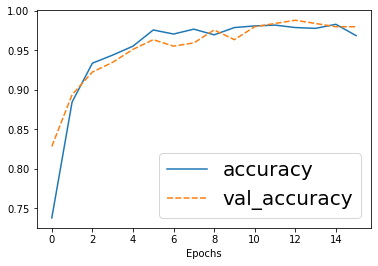

In [250]:
import seaborn as sns
df_accuracy = df[["accuracy","val_accuracy"]]
sns.lineplot(data=df_accuracy)
plt.legend(prop={"size":20})
plt.xlabel("Epochs")